# Author: Sheetal V K

## Task 6: Prediction using Decision Tree Algorithm - The Sparks Foundation

## Objective: To create a decision tree classifier and visualize it graphically.

# Step 1: Import the datasets and libraries, check shape and datatype.

In [129]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [130]:
#importing the data
data = pd.read_csv("Iris.csv")
print("Data imported successfully")

Data imported successfully


In [131]:
#displaying the imported data
print("The Displaying of data")
data.head(10)

The Displaying of data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [132]:
#checking the shape
data.shape

(150, 6)

In [133]:
#describing the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [134]:
#to check the datatype
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [135]:
#checking for null value in the dataset
if(data.isnull == True):
    print("Null value present in the dataset")
else:
    print("No null value present- can visualize the data")

No null value present- can visualize the data


# Step 2: Visualise the dataset

In [136]:
#removing the Id column as it is not a feature
data.drop("Id", axis=1 , inplace=True)
print('Id column dropped successfully')

Id column dropped successfully


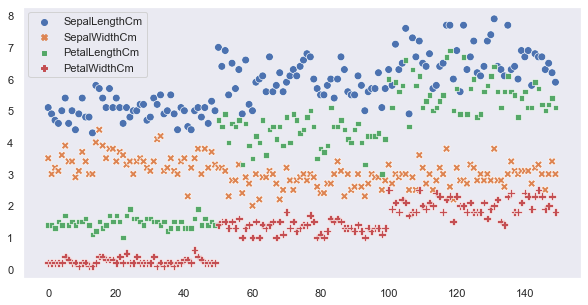

In [137]:
#Plotting distribution of data
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, s=60, alpha=1)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Scatter Plot representing the 3 categories')

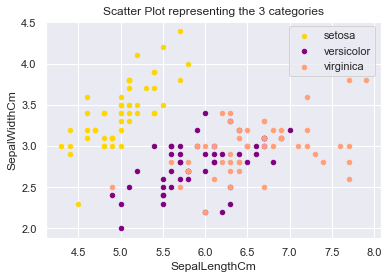

In [138]:
# scatter plot using pandas
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='gold', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='purple', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='lightsalmon', label='virginica', ax=ax)
ax.set_title("Scatter Plot representing the 3 categories")

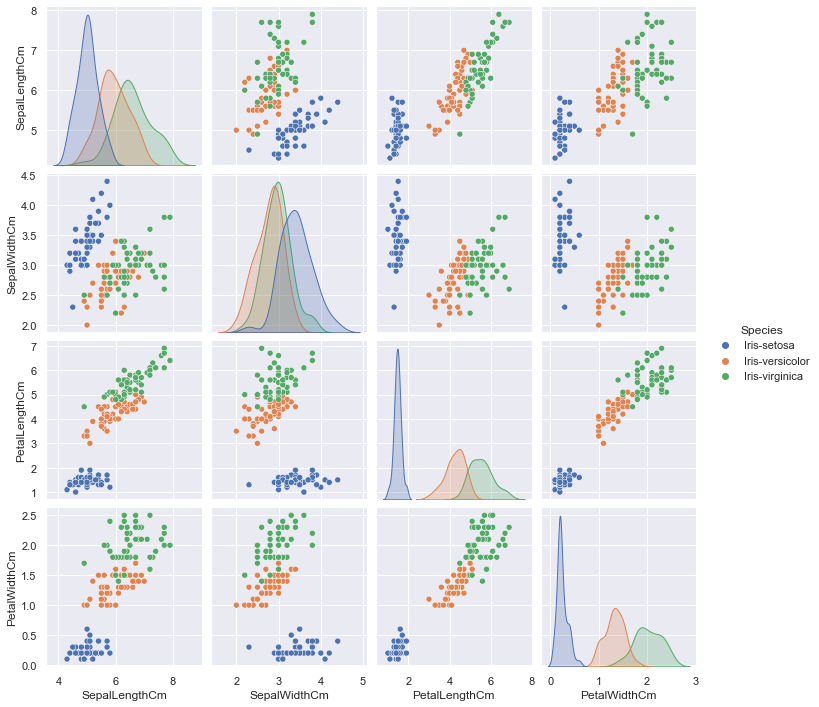

In [139]:
# Paired plot using seaborn
sns.set()
sns.pairplot(data,hue="Species")

# Step 3: Data Preprocessing

In [140]:
# initializing the target and the features from the data - required for visualization
target=data['Species'].unique()
df=data.copy()
features=df.columns.tolist()[:-1]
print('Features:',features)
print('Target: ',target)

Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [141]:
#division of data into "attributes" (inputs) and "labels" (outputs)
X = data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species']) #converting labels into numeric form
y = data['Species'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Step 4: Training the Model

In [142]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print('Splitting the data is completed.')

Splitting the data is completed.


In [143]:
#Defining the shape of the training and testing attributes
print("Training split:",X_train.shape)
print("Testing split:",X_test.shape)

Training split: (120, 4)
Testing split: (30, 4)


In [144]:
#Defining the Model - Decision Tree
decisiontree = DecisionTreeClassifier()
#Training the model using training data
model = decisiontree.fit(X_train, y_train)
print('Model created')

Model created


# Step 5: To make predictions

In [145]:
#Making predictions using test data
y_pred = model.predict(X_test)
print(X_test,y_pred)

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]] [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [146]:
#Display of prediction
prediction = pd.DataFrame({'SepalLengthCm': [i[0] for i in X_test],'SepalWidthCm': [i[1] for i in X_test],'PetalLengthCm': [i[2] for i in X_test],'PetalWidthCm': [i[3] for i in X_test], 'Predicted Species': [k for k in y_pred]})
prediction

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Species
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
5,5.4,3.4,1.5,0.4,0
6,5.6,2.9,3.6,1.3,1
7,6.9,3.1,5.1,2.3,2
8,6.2,2.2,4.5,1.5,1
9,5.8,2.7,3.9,1.2,1


# Step 6: Comparing the actual and predicted values

In [147]:
compared_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
compared_result

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


# Step 7: Visually comparing the predicted and actual results

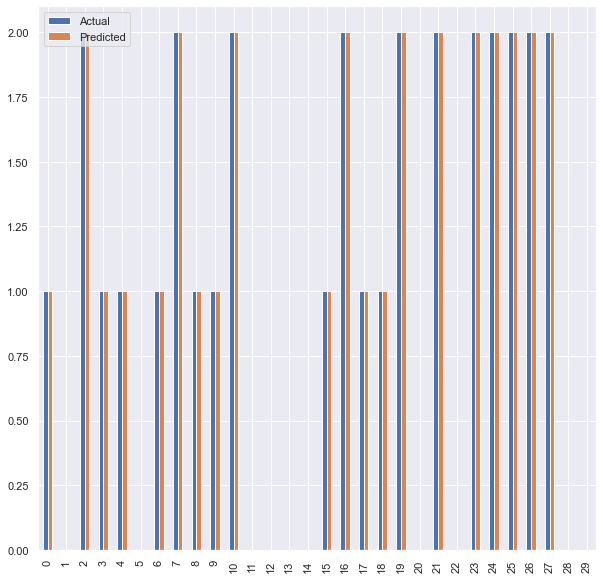

In [148]:
# Plotting the Bar graph
compared_result.plot(kind='bar',figsize=(10,10))
plt.show()

# Step 8: Evaluating the model

In [149]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-2: 1.0
Accuracy: 1.0


#### The R-2 gives the score of the model fit. In this case it is 1, it is the best score. Also the Accuracy is 1, which means the Accuracy is 100% .

# Step 9: Visualizing the model

In [150]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [151]:
# Text representation of the model- Decision Tree Classifier
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: 2



In [152]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [153]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz

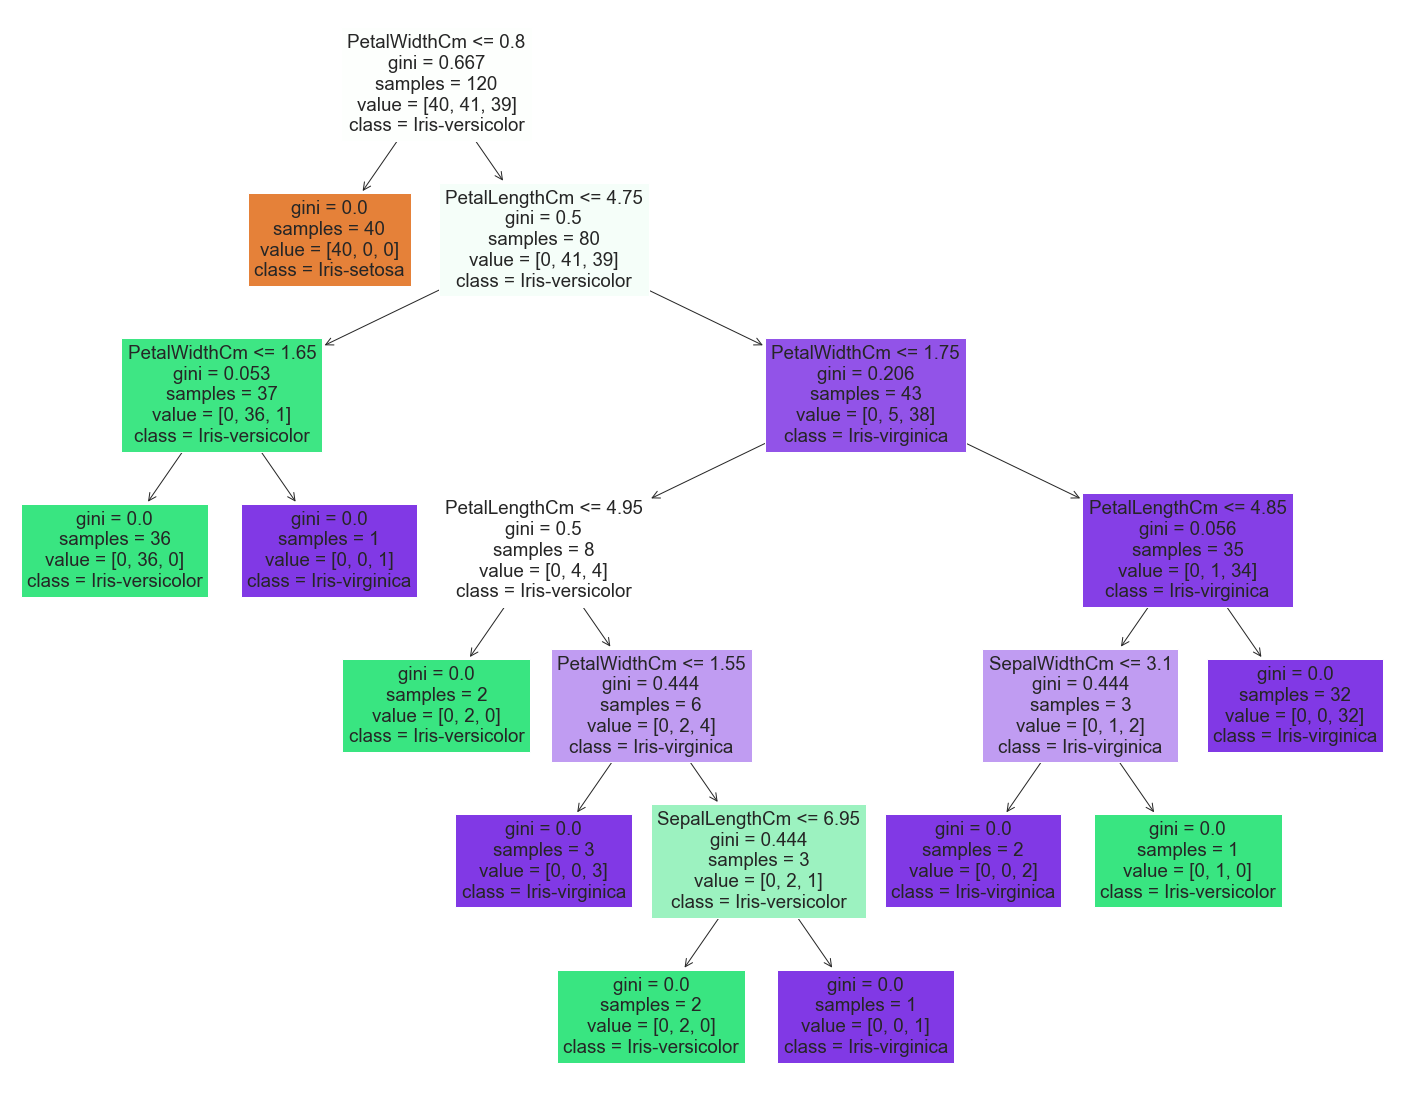

In [154]:
#Visualization with plot tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=features,  
                   class_names=target,
                   filled=True)

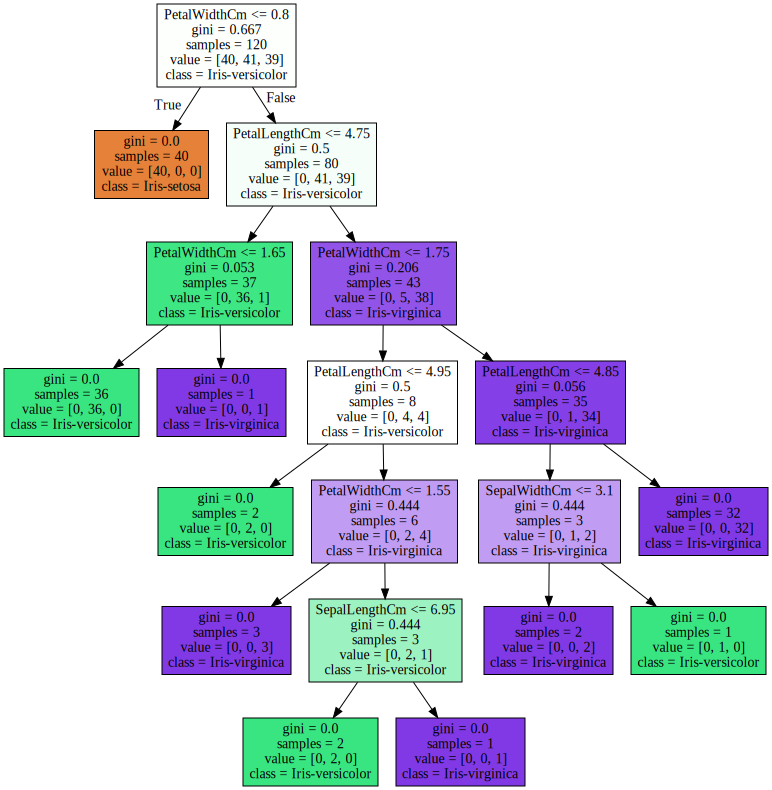

In [155]:
#Visualization with graphviz
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=features,  
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [156]:
#to generate an image of the graph
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

# Conclusion

#### The Decision Tree Classifier was built and was trained and tested with train and test data respectively. The model shows an accuracy of 100%. If any new data is fed into this classifier, it would be able to predict the right class accordingly.

# Thank You